# ¿Qué hace a una Canción Favorita?

Realizado por:
- Adrian Marcelo Ballesteros Herrera
- Miguel Aaron Castillo Ochoa
- María Fernanda Muñoz Sevilla

## Objetivos Generales

Nosotros intentamos desarrollar un modelo predictivo basado en técnicas de regresión que permita estimar el nivel de popularidad de canciones en Spotify a partir de sus características musicales, utilizando para ello un dataset obtenido de Kaggle. El proyecto busca identificar patrones y relaciones significativas entre los atributos de las canciones y su desempeño en la plataforma, aplicando una metodología robusta de machine learning que garantice la confiabilidad de los predicciones.

## Objetivos Específicos

1.Recopilar y preparar el conjunto de datos: Adquirir el dataset público de canciones de Spotify desde Kaggle, para luego realizar un proceso exhaustivo de limpieza y preprocesamiento de datos que incluye el tratamiento de valores nulos y outliers, así como el escalado de las variables numéricas, con el fin de garantizar su significancia para  el modelado.

2.Realizar un análisis exploratorio inicial: Examinar y visualizar la distribución de las variables y las relaciones bivariadas con la variable objetivo (popularidad), para generar hipótesis iniciales sobre qué características musicales podrían ser los predictores más relevantes en el modelo.

3.Construir y entrenar modelos de regresión: Implementar y comparar el desempeño de tres modelos distintos hechos por cada parte del equipo

4.Validar el desempeño y diagnosticar el sobreajuste: Evaluar la capacidad de generalización de cada modelo mediante la técnica de División Entrenamiento-Prueba (Train-Test Split) y Validación Cruzada con K-Folds, con el fin de identificar, cuantificar y controlar la presencia de sobreajuste (overfitting), no usamos el modelo LOOCV  ya que serian mas de 1000 regresiones.

5.Analizar y seleccionar el modelo final: Interpretar las métricas de rendimiento (como R²) de todos los modelos probados, para seleccionar aquel que ofrezca el mejor equilibrio entre precisión predictiva y si realmente es capaz de generalizar o hay mucha varianza que no es posible de representar los datos, identificando al mismo tiempo las características musicales que más influyen en la predicción.


## Marco Teórico

En este proyecto buscaremos analizar las relaciones que tienen las características de una canción, para ver cómo estas se relacionan con su éxito en spotify, mediante el número de streams. Para esto se realizaran distintos procesos para obtener nuestro modelo de regresión, es por esto que, es necesario conocer y profundizar sobre los procedimientos que vamos a realizar, como lo es la regresión lineal, que consiste en hacer una aproximación respecto a la relación de dependencia que involucra variables independientes y dependientes. Existen distintos tipos de regresiones, las hay simples, que permiten saber cómo es el vínculo entre variables y hacer una predicción del valor que alcanza una variable dependiente con una variable independiente. Por otra parte, la regresión múltiple estudia la correlación entre al menos un par de variables mediante ecuaciones, mientras que la regresión polinomial es cuando la relación entre las variables independientes y una variable dependiente se modelan mediante un polinomio, es un tipo de regresión no lineal, es útil para ajustar conjuntos de datos cuyas gráficas son curvas polinómicas, en este proceto realizamos modelos de orden 3**, para observar el comportamiento de las variables de las características musicales con el éxito de una canción cuando estas características se elevan demasiado. Mediante la regresión podemos observar la interacción entre los factores, que se enfoca en cómo las diferentes variables pueden influir en la respuesta de una forma conjunta, en el modelo polinomial las variables interactuán entre sí, lo que nos muestra como la influencia de una variable puede variar según la combinación de otras variables. Cuando obtenemos estos factores es necesario evaluar su significancia mediante distintas pruebas, en este proyecto los evaluaremos contra el p-value, que es la probabilidad de haber obtenido, por azar, una diferencia ya sea mayor de la observada, cumpliendo que no hat diferencia real en la población de la vienen de las muestras, normalmente el p-value es del 0.05, si el factor es menor a este p-value quiere decir que no fue por azar ese resultado.

Sin embargo, al llevar a cabo la regresión podemos tener ciertos problemas de sobreajuste porque estamos manejando distintas variables y regresiones polinomiales. Para evitar esto, utilizamos las regularizaciones o penalizaciones, que buscan introducir restricciones al modelo, quitandole peso a ciertas variablesára mejorar el equilibrio entre el sesgo y la varianza. En este proyecto nos enfocaremos en tres tipos de regularizaciones, la primera es la de L1, o también conocida como Lasso, que agrega una penalización igual al valor absoluto de la magnitud de los coeficientes, esto puede hacer que ciertos modelos lleven sus coeficientes a ser exactamente a cero; así mismo, tenemos el L2 o Ridge, que añade una penalización igual al cuadrado de la magnitud de los coeficientes, provocando que la distribución del error entre todos los coeficientes en vez de eliminar algunos por completo; por último tenemos el el Elastic Net, que combina las dos penalizaciones anteriores, dando mayor flexibilidad en el manejo de varios tipos de conjuntos de datos. Gracias a todas herramientas, lograremos obtener modelos bien ajustados que nos mostraran el comportamiento de nuestras variables de caraccterísticas de la canción respecto a la popularidad o éxito mediante la variable de streams, para después lograr interpretar los resultados y poner en palabras el comportamiento que presenta cada modelo.


## Análisis de Dataset

El dataset proviene de Kaggle, página donde se pueden encontrar gran catindad y variedad de dataset, el que nosotros escogimos contiene información de canciones populares en Spotify y otras plataformas de streaming, como el artista, año que salió, número de streams, la energía, entre otras características.

In [825]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [827]:
# Leemos el dataset
df=pd.read_csv("C:/Users/munoz/Downloads/lab_apre_est/Popular_Spotify_Songs (1).csv", encoding='latin1')
#agregamos enconding='latin 1', para que se pudiera leer el archivo pues no podia decodificar mediante el tipo utf-8
#Vemos las primeras filas
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [743]:
print("Informacion del dataset:")
df.info()

Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key            

In [729]:
print("Estadisticos descriptivos:")
df.describe()

Estadisticos descriptivos:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


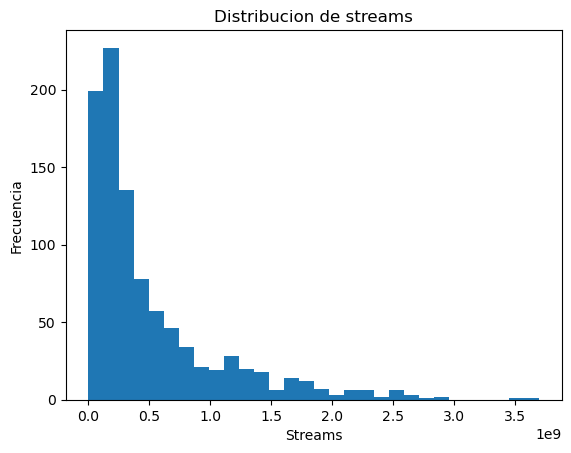

In [731]:
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
plt.hist(df["streams"].dropna(), bins=30)
plt.xlabel("Streams")
plt.ylabel("Frecuencia")
plt.title("Distribucion de streams")
plt.show()

**Numero de registros:** 953 cnanciones.

**Numero de variables:** 24 columnas.

**Ejemplo de variables:**

*track_name* (nombre de la cancion).

*artist(s)_name* (artista o grupo).

*released_year*, *released_month*, *released_day*.

*streams* (numero de reproducciones).

*bpm*, *key*, *mode*.

*danceability_%*, *energy_%*, *valence_%*, *acousticness_%*, 

*instrumentalness_%*, etc

Cada fila representa una cancion popular, con sus metadatos (nombre, artista, fecha de lanzamiento), su exito en plataformas (listas, reproducciones, playlists) y atributos musicales (features de audio como energia, acustica, valance, acustica, etc.)

### Qué queremos analizar

En este proyecto vamos a buscar estudiar y analizar como las características musicales de las canciones afectan al número de streams (reproducciones), por ejemplo, que tanto imapacta la energía que transmite la canción, su bailabilidad o facilidad para bailar, su instrumental, en genral que características y combinaciones de estas proporcionan que tengan más éxito o popularidad una canción.


### Transformaciones Necesarias

Algunas variables requieren procesamiento antes de usarse en un modelo de regresion:
* **Variables de texto/categorias:**
  * *artist(s)_name*, *track_name*, *key*, *mode*, deben convertirse en variables categoricas (codificacion dummy).
* **Variables numericas mal tipadas:**
  * *streams* aparece como texto, se debe convertir a numero.
* **Variables de fecha:**
  * *released_year*, *released_month*, released_day*, se pueden combinar en una sola variable temporal o usarse como enteros.
* **Porcentajes:**
  * *danceability_%*, *energy_%*, *valance_%*, etc. estan en escala 0-100, conviene normalizarlos a 0-1.
* **Escalamiento:**
  * Variables como *streams*, *bpm* y porcentajes deben ser escaladas para usarse en regresiones con penalizacion.

### Transformaciones que vamos a usar

**Convertimos stream de objeto a numérico**

In [829]:
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")

**Variables de Fecha**

In [350]:
df["released_date"] = pd.to_datetime(
    dict(year = df["released_year"],
         month = df["released_month"],
         day = df["released_day"]),
    errors = "coerce"
)

df["song_age"] = 2025 - df["released_year"]

**Variables Categóricas**

In [309]:
df = pd.get_dummies(df, columns = ["key", "mode"], drop_first = True)

**Normalizamos columnas de % (0-100 a 0-1)**

In [330]:
percent_cols = [c for c in df.columns if c.endswith("%")]
for col in percent_cols:
    new_col = col.replace("%", "_scaled")
    df[new_col] = df[col] / 100.0

## Modelos Propuestos

En este proyecto presentares tres distintos de modelos, en los cuales se compararan entre ellos mediante su forma sin penalización, con penalización de Ridge, Lasso y ElsaticNet.

### Modelo de Orden 1

In [881]:
df1=df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    object 
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    object 
 14  bpm                   816 non-null    int64  
 15  key                   816 no

In [839]:
#Eliminamos columnas 
df1=df1.drop(columns=["track_name","artist(s)_name","artist_count","released_year","released_month","released_day","in_apple_playlists","in_apple_charts","in_deezer_playlists","in_deezer_charts","in_shazam_charts","key","mode"])
df1

,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,553,147,141381703.0,125,80,89,83,31,0,8,4
1,1474,48,133716286.0,92,71,61,74,7,0,10,4
2,1397,113,140003974.0,138,51,32,53,17,0,31,6
3,7858,100,800840817.0,170,55,58,72,11,0,11,15
4,3133,50,303236322.0,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
948,953,0,91473363.0,144,60,24,39,57,0,8,3
949,1180,0,121871870.0,166,42,7,24,83,1,12,6
950,573,0,73513683.0,92,80,81,67,4,0,8,6
951,1320,0,133895612.0,97,82,67,77,8,0,12,5


Decidimios eliminar las columnas de "track_name"; "artist(s)_name"; "artist_count"; "released_month"; "released_day"; "key"; "mode", porque son variables que no nos ofrecen información relevante para nuestro analisis de que tipo de canciones son las favoritas para las personas hoy en día. También, como nos enfocamos en Spotify, eliminamos las columnas que nos hablan sobre otras aplicaciones de música. Por otra parte, no necesitamos la transfomación de datos dummies, pues no tenemos valores cualitativos.

In [841]:
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   in_spotify_playlists  816 non-null    int64  
 1   in_spotify_charts     816 non-null    int64  
 2   streams               816 non-null    float64
 3   bpm                   816 non-null    int64  
 4   danceability_%        816 non-null    int64  
 5   valence_%             816 non-null    int64  
 6   energy_%              816 non-null    int64  
 7   acousticness_%        816 non-null    int64  
 8   instrumentalness_%    816 non-null    int64  
 9   liveness_%            816 non-null    int64  
 10  speechiness_%         816 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 76.5 KB


In [570]:
#Selección de variables predictoras
x_base = df1[[
    'in_spotify_playlists','in_spotify_charts','bpm',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]].values

y = df1['streams'].astype(float).values  # Asegúrate que y sea numérico
n = len(y)

In [572]:
# Escalamiento antes de aplicar potencias
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_base)

# Construcción de términos polinómicos manuales
x1 = x_scaled
unos = np.ones([n, 1])
X = np.hstack([unos, x1])

#Separo nuestros datos un 60%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=137)

#estandarizamos
scaler=StandardScaler().fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Realizamos el modelo sin Penalización

In [575]:
#Hacemos la regresión lineal
x_train_e= sm.add_constant(x_train_scaled)
resultado= sm.OLS(y_train,x_train_e).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     52.69
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.42e-61
Time:                        00:00:52   Log-Likelihood:                -6863.5
No. Observations:                 326   AIC:                         1.375e+04
Df Residuals:                     315   BIC:                         1.379e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.795e+08    1.9e+07     25.277      0.000    4.42e+08    5.17e+08
x1         -3.634e-09   5.86e-09     -0.620      0.536   -1.52e-08     7.9e-09
x2          4.223e+08   1.99e+07     21.193      0.000    3.83e+08    4.61e+08
x3           6.51e+07   1.96e+07      3.330      0.001    2.66e+07    1.04e+08
x4          1.706e+07   1.99e+07      0.857      0.392   -2.21e+07    5.62e+07
x5          1.861e+07   2.36e+07      0.789      0.431   -2.78e+07     6.5e+07
x6         -4.081e+06    2.3e+07     -0.178      0.859   -4.93e+07    4.11e+07
x7         -2.812e+07   2.54e+07     -1.109      0.268    -7.8e+07    2.18e+07
x8          2.534e+07   2.39e+07      1.060      0.290   -2.17e+07    7.24e+07
x9         -5.372e+06   1.93e+07     -0.278      0.781   -4.34e+07    3.26e+07
x10         1.619e+06   1.96e+07      0.082      0.934    -3.7e+07    4.03e+07
x11        -3.099e+07   2.02e+07     -1.532      0.127   -7.08e+07    8.82e+06
==============================================================================
Omnibus:                      109.915   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.808
Skew:                           1.167   Prob(JB):                    1.78e-185
Kurtosis:                      10.562   Cond. No.                     3.58e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.09e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [577]:
#Sacamos lor R2 de x_train y x_test

#preparamos x_test
x_test_e=sm.add_constant(x_test_scaled)
y_pred=resultado.predict(x_test_e)
#calculamos r2 de xtrain
r2_train=resultado.rsquared
print("R2 de train: ",r2_train)

#calculamos r2 de xtest
r2_test=r2_score(y_test, y_pred)
print("R2 de test: ",r2_test)

R2 de train:  0.6258493524453153
R2 de test:  0.6173155886847097


### Con Penalización de L2, Ridge

In [580]:
#Con alfa = 0.5, con xtrain_scaled y xtest_scaled
ridge= Ridge(alpha=0.5)
ridge.fit(x_train_scaled, y_train)
#preparamos para sacar las r2 de ridge1 (nuestro modelo), sacando las y_pred, 
y_pred_train=ridge.predict(x_train_scaled)
y_pred_test=ridge.predict(x_test_scaled)

#sacamos r2
r2_ridge_train=r2_score(y_train,y_pred_train)
r2_ridge_test=r2_score(y_test,y_pred_test)
print("R2 de train (Ridge): ", r2_ridge_train)
print("R2 de test (Ridge): ", r2_ridge_test)

R2 de train (Ridge):  0.6258477709477072
R2 de test (Ridge):  0.6171888916648742


### Con Penalización de L1, Lasso

In [583]:
#Con alfa = 0.5, con xtrain_scaled y xtest_scaled
lasso= Lasso(alpha=0.5)
lasso.fit(x_train_scaled, y_train)
#preparamos para sacar las r2 de ridge1 (nuestro modelo), sacando las y_pred, 
y_pred_trainl=lasso.predict(x_train_scaled)
y_pred_testl=lasso.predict(x_test_scaled)

#sacamos r2
r2_lasso_train=r2_score(y_train,y_pred_trainl)
r2_lasso_test=r2_score(y_test,y_pred_testl)
print("R2 de train (Lasso): ", r2_lasso_train)
print("R2 de test (Lasso) : ", r2_lasso_test)

R2 de train (Lasso):  0.6258493524453153
R2 de test (Lasso) :  0.6173155890330586


### Con penalización ElasticNet

In [586]:
# Con alfa = 0.5, porque así se comporta como ridge y lasso
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(x_train_scaled, y_train)

# Predicciones
y_pred_train_elastic = elastic.predict(x_train_scaled)
y_pred_test_elastic = elastic.predict(x_test_scaled)

# Sacamos las R^2
r2_elastic_train = r2_score(y_train, y_pred_train_elastic)
r2_elastic_test = r2_score(y_test, y_pred_test_elastic)

print("R² de train (ElasticNet):", r2_elastic_train)
print("R² de test (ElasticNet):", r2_elastic_test)

R² de train (ElasticNet): 0.6009048275800373
R² de test (ElasticNet): 0.5765134814559659


### Comparamos las R^2

In [589]:
#R^2 de train
print("R2 de train (sin penalización): ",r2_train)
print("R2 de train (Ridge): ", r2_ridge_train)
print("R2 de train (Lasso): ", r2_lasso_train)
print("R² de train (ElasticNet):", r2_elastic_train)

R2 de train (sin penalización):  0.6258493524453153
R2 de train (Ridge):  0.6258477709477072
R2 de train (Lasso):  0.6258493524453153
R² de train (ElasticNet): 0.6009048275800373


In [541]:
#R^2 de test
print("R2 de test: ",r2_test)
print("R2 de test (Ridge): ", r2_ridge_test)
print("R2 de test (Lasso) : ", r2_lasso_test)
print("R² de test (ElasticNet):", r2_elastic_test)

R2 de test:  0.6173155886847097
R2 de test (Ridge):  0.6171888916648742
R2 de test (Lasso) :  0.6173155890330586
R² de test (ElasticNet): 0.5765134814559659


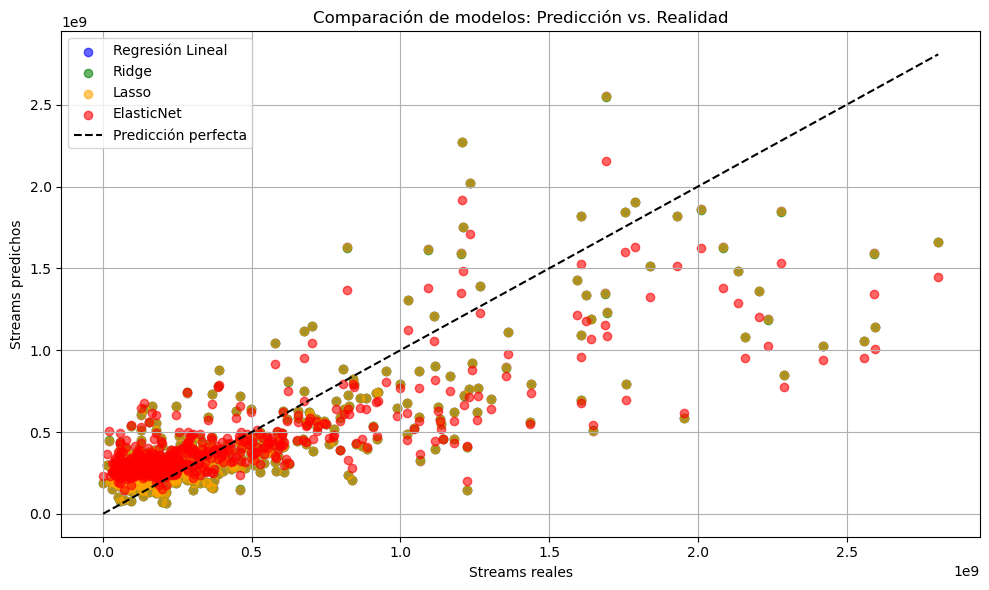

In [626]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Regresión lineal
plt.scatter(y_test, y_pred, alpha=0.6, label='Regresión Lineal', color='blue')

# Ridge
plt.scatter(y_test, y_pred_test, alpha=0.6, label='Ridge', color='green')

# Lasso
plt.scatter(y_test, y_pred_testl, alpha=0.6, label='Lasso', color='orange')

# ElasticNet
plt.scatter(y_test, y_pred_test_elastic, alpha=0.6, label='ElasticNet', color='red')

# Línea de referencia
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Predicción perfecta')

plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Comparación de modelos: Predicción vs. Realidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Podemos observar que el R^2 de entrenamiento del modelo sin penalizar es el mejor, esto nos sugiere que es el modelo más preciso para identificar la relación entre las carecterísticas musicales y el éxito en stream. Sin embargo, al no penalizar nos podemos enfrentar al sobreajuste, por eso realizamos las penalizaciones de Lasso y Ridge, que nos dieron valores muy similares a nuestra R^2 sin penalizar, mientras que, en ElasticNet tuvimos una diferencia notable, esto puede ser porque este descartando variables útiles por exceso de regularización. Con estos resultados podemos decir que las características musicales que presentan las canciones si pueden explicar bien su éxito en Spotify.

### Análisis de significancia de factores para modelo sin penalización.

En el modelo podemos ver que presentamos p-values muy altos, con excepción de dos variables que mostraron si tener significancia, x2 y x3 que corresponde a una variable original, en este caso: 'in_spotify_charts','bpm'; podemos suponer que estas características de la canción entre más crezcan podrían tiener más efecto en el éxito de una canción.
Por otra parte, observamos que el resto de las variables tienen p-values muy altos, lo que indica que sus efectos no son estadísticamente significativos en este modelo, dandonos a entender que el éxito musical de una canción esta ligado a un subconjunto específico de características, la popularidad musical no depende de una fórmula universal, sino de combinaciones específicas de características que atraen al público.  

###  Modelo 2 Orden 2

In [628]:
# Selección de variables predictoras (mismas que en Modelo 1)
x_base2 = df1[[
    'in_spotify_playlists','in_spotify_charts','bpm',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]].values

y2 = df1['streams'].astype(float).values  # Asegúrate que y sea numérico
n2 = len(y2)

In [630]:
# Escalamiento antes de aplicar potencias
scaler2 = StandardScaler()
x_scaled2 = scaler2.fit_transform(x_base2)

In [632]:
# Construcción de términos polinómicos manuales (solo hasta grado 2)
x1_2 = x_scaled2
x2_2 = x1_2**2
unos2 = np.ones([n2, 1])
X2 = np.hstack([unos2, x1_2, x2_2])

In [634]:
# Separo nuestros datos un 60%
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.60, random_state=137)

# estandarizamos
scaler2b = StandardScaler().fit(x2_train)
x2_train_scaled = scaler2b.transform(x2_train)
x2_test_scaled  = scaler2b.transform(x2_test)

In [636]:
# ==== Sin penalización ====
x2_train_e = sm.add_constant(x2_train_scaled)
resultado2 = sm.OLS(y2_train, x2_train_e).fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     47.53
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.60e-81
Time:                        01:09:56   Log-Likelihood:                -6793.1
No. Observations:                 326   AIC:                         1.363e+04
Df Residuals:                     305   BIC:                         1.371e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.795e+08   1.55e+07     30.869      0.000    4.49e+08     5.1e+08
x1          1.802e-07   2.26e-08      7.988      0.000    1.36e-07    2.25e-07
x2           7.97e+08   3.58e+07     22.245      0.000    7.26e+08    8.67e+08
x3           5.83e+07   2.64e+07      2.209      0.028    6.36e+06     1.1e+08
x4          1.652e+07   1.76e+07      0.938      0.349   -1.81e+07    5.12e+07
x5          1.557e+07   2.14e+07      0.728      0.467   -2.65e+07    5.77e+07
x6          2.894e+06   1.92e+07      0.150      0.881    -3.5e+07    4.08e+07
x7         -8.563e+06   2.15e+07     -0.399      0.690   -5.08e+07    3.36e+07
x8           3.16e+07   2.42e+07      1.306      0.193    -1.6e+07    7.92e+07
x9          1.988e+07   4.69e+07      0.424      0.672   -7.24e+07    1.12e+08
x10        -1.681e+05   2.53e+07     -0.007      0.995   -4.99e+07    4.95e+07
x11        -4.619e+07    3.1e+07     -1.488      0.138   -1.07e+08    1.49e+07
x12        -4.186e+08   3.46e+07    -12.106      0.000   -4.87e+08   -3.51e+08
x13        -4.367e+07   2.54e+07     -1.723      0.086   -9.36e+07    6.22e+06
x14        -4.078e+05    1.9e+07     -0.021      0.983   -3.79e+07    3.71e+07
x15        -1.997e+07   1.75e+07     -1.142      0.254   -5.44e+07    1.44e+07
x16         2.141e+07   1.64e+07      1.307      0.192   -1.08e+07    5.36e+07
x17        -2.484e+07   1.83e+07     -1.355      0.176   -6.09e+07    1.12e+07
x18        -4.499e+06   2.37e+07     -0.190      0.850   -5.11e+07    4.21e+07
x19        -1.823e+07   4.67e+07     -0.390      0.697    -1.1e+08    7.37e+07
x20         6.582e+06   2.49e+07      0.264      0.792   -4.24e+07    5.56e+07
x21          3.34e+07   2.96e+07      1.128      0.260   -2.49e+07    9.17e+07
==============================================================================
Omnibus:                      104.318   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.968
Skew:                           1.172   Prob(JB):                    1.78e-139
Kurtosis:                       9.446   Cond. No.                     2.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [638]:
# R² de train y test
x2_test_e = sm.add_constant(x2_test_scaled)
y2_pred = resultado2.predict(x2_test_e)

r2_train2 = resultado2.rsquared
print("R2 de train (grado 2, sin penalización): ", r2_train2)

r2_test2 = r2_score(y2_test, y2_pred)
print("R2 de test  (grado 2, sin penalización): ", r2_test2)

R2 de train (grado 2, sin penalización):  0.7570925458209812
R2 de test  (grado 2, sin penalización):  0.7033390651266269


In [640]:
# ==== Ridge ====
ridge2 = Ridge(alpha=0.5)
ridge2.fit(x2_train_scaled, y2_train)
print("R2 de train (grado 2, Ridge):", r2_score(y2_train, ridge2.predict(x2_train_scaled)))
print("R2 de test  (grado 2, Ridge):", r2_score(y2_test,  ridge2.predict(x2_test_scaled)))


R2 de train (grado 2, Ridge): 0.7570383947067876
R2 de test  (grado 2, Ridge): 0.7038995865566399


In [642]:
# ==== Lasso ====
lasso2 = Lasso(alpha=0.5, max_iter=10000)
lasso2.fit(x2_train_scaled, y2_train)
print("R2 de train (grado 2, Lasso):", r2_score(y2_train, lasso2.predict(x2_train_scaled)))
print("R2 de test  (grado 2, Lasso):", r2_score(y2_test,  lasso2.predict(x2_test_scaled)))


R2 de train (grado 2, Lasso): 0.7570925458209811
R2 de test  (grado 2, Lasso): 0.7033390668856399


In [644]:
# ==== ElasticNet ====
elastic2 = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)
elastic2.fit(x2_train_scaled, y2_train)
print("R2 de train (grado 2, ElasticNet):", r2_score(y2_train, elastic2.predict(x2_train_scaled)))
print("R2 de test  (grado 2, ElasticNet):", r2_score(y2_test,  elastic2.predict(x2_test_scaled)))

R2 de train (grado 2, ElasticNet): 0.6228210173155527
R2 de test  (grado 2, ElasticNet): 0.5796424310902101


In [646]:
# COMPARACIÓN DE R² (Modelo 2)
print("\n===== R² de TRAIN (Modelo 2: grado 2) =====")
print("Sin penalización:", r2_train2)
print("Ridge:", r2_score(y2_train, ridge2.predict(x2_train_scaled)))
print("Lasso:", r2_score(y2_train, lasso2.predict(x2_train_scaled)))
print("ElasticNet:", r2_score(y2_train, elastic2.predict(x2_train_scaled)))

print("\n===== R² de TEST (Modelo 2: grado 2) =====")
print("Sin penalización:", r2_test2)
print("Ridge:", r2_score(y2_test, ridge2.predict(x2_test_scaled)))
print("Lasso:", r2_score(y2_test, lasso2.predict(x2_test_scaled)))
print("ElasticNet:", r2_score(y2_test, elastic2.predict(x2_test_scaled)))


===== R² de TRAIN (Modelo 2: grado 2) =====
Sin penalización: 0.7570925458209812
Ridge: 0.7570383947067876
Lasso: 0.7570925458209811
ElasticNet: 0.6228210173155527

===== R² de TEST (Modelo 2: grado 2) =====
Sin penalización: 0.7033390651266269
Ridge: 0.7038995865566399
Lasso: 0.7033390668856399
ElasticNet: 0.5796424310902101


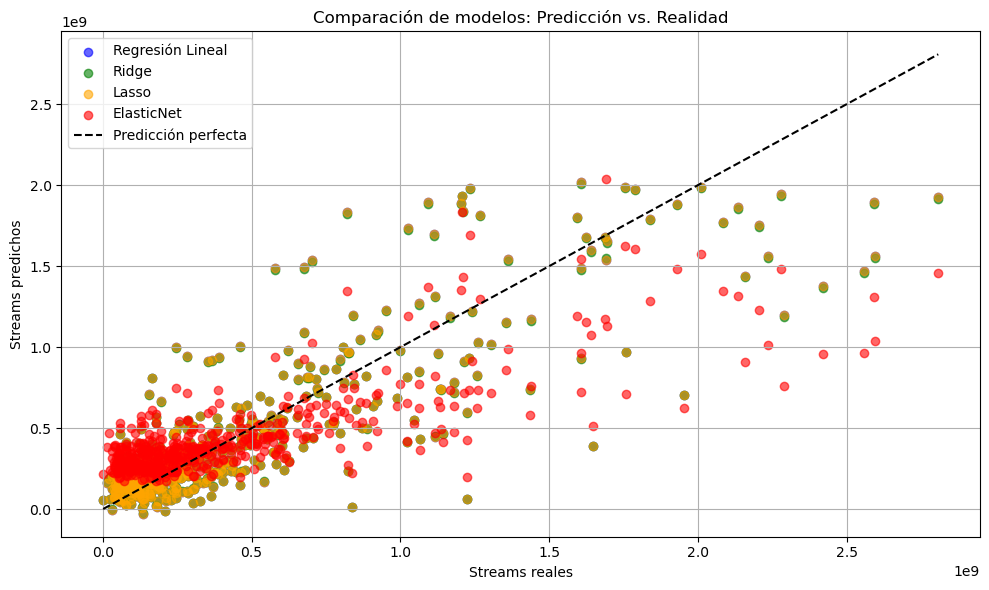

In [652]:

plt.figure(figsize=(10, 6))

# Regresión lineal
plt.scatter(y2_test,y2_pred, alpha=0.6, label='Regresión Lineal', color='blue')

# Ridge
plt.scatter(y2_test,ridge2.predict(x2_test_scaled), alpha=0.6, label='Ridge', color='green')

# Lasso
plt.scatter(y2_test,lasso2.predict(x2_test_scaled) , alpha=0.6, label='Lasso', color='orange')

# ElasticNet
plt.scatter(y2_test, elastic2.predict(x2_test_scaled), alpha=0.6, label='ElasticNet', color='red')

# Línea de referencia
min_val = min(y2_test.min(), y_pred.min())
max_val = max(y2_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Predicción perfecta')

plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Comparación de modelos: Predicción vs. Realidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de modelo sin penalización

El Modelo 2 (grado 2) mostró un buen desempeño predictivo con un R² cercano a 0.75 en entrenamiento y 0.70 en prueba. Los coeficientes obtenidos indican que solo algunos predictores resultan estadísticamente significativos (como x1, x2, x3 y x12, mientras que la mayoría no aporta evidencia suficiente, lo que refleja que gran parte de los términos cuadráticos agregan ruido más que información. Además, los diagnósticos revelan problemas de multicolinealidad severa (cond. no. muy elevado) y colas pesadas en los residuos, aunque no se observó autocorrelación. Las versiones con Ridge y Lasso estabilizan el modelo sin modificar mucho el poder explicativo, mientras que ElasticNet con los parámetros probados pierde desempeño. En conclusión, este modelo confirma que no es necesario llegar a grado tres o mayores para capturar la relación entre las variables y los streams, pues con grado dos ya se alcanza un ajuste muy parecido, aunque con menor interpretabilidad debido a la presencia de muchos términos poco relevantes.

In [904]:
#Selección de variables predictoras
x = df1[[
    'released_year','in_spotify_playlists','in_spotify_charts','bpm',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]].values
n = len(x)
x1 = x
x2 = x**2
x3 = x**3
x4=x**4
unos = np.ones([n, 1])
X3 = np.hstack([unos, x1, x2, x3,x4])
y = df1['streams'].astype(float).values
n = len(y)

In [906]:
modelo=sm.OLS(y,X3)
results=modelo.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          2.18e-220
Time:                        01:46:42   Log-Likelihood:                -16978.
No. Observations:                 816   AIC:                         3.400e+04
Df Residuals:                     794   BIC:                         3.410e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3946      2.418     11.327      0.000      22.647      32.142
x1         -4330.7648    382.050    -11.336      0.000   -5080.713   -3580.817
x2          1.145e+05   1.01e+04     11.334      0.000    9.47e+04    1.34e+05
x3            67.4369      5.912     11.407      0.000      55.832      79.042
x4             7.1110      0.631     11.277      0.000       5.873       8.349
x5            -2.6011      0.283     -9.196      0.000      -3.156      -2.046
x6           -13.9570      1.231    -11.342      0.000     -16.372     -11.542
x7            -7.9029      0.692    -11.423      0.000      -9.261      -6.545
x8           -23.2232      2.074    -11.197      0.000     -27.294     -19.152
x9             8.2748      1.285      6.440      0.000       5.753      10.797
x10            8.7794      0.918      9.567      0.000       6.978      10.581
x11           16.6073      3.270      5.078      0.000      10.188      23.027
x12        -2547.4645    225.047    -11.320      0.000   -2989.222   -2105.707
x13           -1.2404      1.148     -1.081      0.280      -3.494       1.013
x14         1738.7345    152.002     11.439      0.000    1440.360    2037.109
x15          567.0648     50.437     11.243      0.000     468.059     666.070
x16          -94.2527     14.529     -6.487      0.000    -122.773     -65.733
x17         -223.0758     20.630    -10.813      0.000    -263.571    -182.580
x18         -287.6624     26.076    -11.032      0.000    -338.848    -236.477
x19         -465.0711     43.575    -10.673      0.000    -550.607    -379.535
x20          -17.5576     42.241     -0.416      0.678    -100.475      65.360
x21          124.0497     24.214      5.123      0.000      76.518     171.581
x22          156.2558     92.976      1.681      0.093     -26.252     338.764
x23            0.8614      0.320      2.690      0.007       0.233       1.490
x24        -3.332e-05   4.19e-05     -0.794      0.427      -0.000     4.9e-05
x25          321.5561    257.039      1.251      0.211    -183.001     826.113
x26         -114.3976     55.681     -2.055      0.040    -223.697      -5.098
x27         1109.7600    492.717      2.252      0.025     142.578    2076.942
x28          -16.4294    327.537     -0.050      0.960    -659.369     626.510
x29         -697.7628    499.040     -1.398      0.162   -1677.356     281.830
x30          748.5761    420.232      1.781      0.075     -76.321    1573.473
x31        -1660.7647   1414.182     -1.174      0.241   -4436.743    1115.213
x32         -543.1932    675.970     -0.804      0.422   -1870.092     783.706
x33        -2599.8277   2029.918     -1.281      0.201   -6584.467    1384.812
x34            0.0002      0.000      1.509      0.132   -6.17e-05       0.000
x35         5.122e-10   4.61e-10      1.111      0.267   -3.93e-10    1.42e-09
x3

In [908]:
n = len(y)
sep = 10
fold = n // sep
RA = []
RB = []

for i in range(sep):
    X_train = np.concatenate([X3[:i*fold], X3[(i+1)*fold:]])
    y_train = np.concatenate([y[:i*fold], y[(i+1)*fold:]])
    X_test = X3[i*fold:(i+1)*fold]
    y_test = y[i*fold:(i+1)*fold]
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_sm = sm.add_constant(X_train_scaled)
    X_test_sm = sm.add_constant(X_test_scaled, has_constant='add')
    modelo_mpg = sm.OLS(y_train, X_train_sm)
    modelo_mpg = modelo_mpg.fit()
    y_pred_train = modelo_mpg.predict(X_train_sm)
    y_pred_test = modelo_mpg.predict(X_test_sm)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    RA.append(r2_train)
    RB.append(r2_test)

R2_train=np.mean(RA)
R2_test=np.mean(RB)
print(f"R² promedio de train: {np.mean(RA)} ")
print(f"R² promedio de test: {np.mean(RB)} ")


R² promedio de train: 0.7742589443654027 
R² promedio de test: -5.801126488797075 


In [910]:
ridge= Ridge(alpha=1)
listaA=[]
listab=[]
for i in range(sep):
   X_train=np.concatenate([X3[:i*fold],X3[(i+1)*fold:]])
   y_train=np.concatenate([y[:i*fold],y[(i+1)*fold:]])
   X_test=X3[i*fold:(i+1)*fold]
   y_test=y[i*fold:(i+1)*fold]
   scaler = StandardScaler().fit(X_train)
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ridge.fit(X_train_scaled, y_train)
   y_pred_trainr=ridge.predict(X_train_scaled)
   y_pred_testr=ridge.predict(X_test_scaled)
    #sacamos r2
   r2_ridge_train=r2_score(y_train,y_pred_trainr)
   r2_ridge_test=r2_score(y_test,y_pred_testr)
   listaA.append(r2_ridge_train)
   listab.append(r2_ridge_test)


    #sacamos el promedio de Rr2
R2_train_ridge=np.mean(listaA)
R2_test_ridge=np.mean(listab)
mla=R2_train_ridge
mlb=R2_test_ridge
print("R2 de train (Ridge): ", mla)
print("R2 de test (Ridge): ", mlb)

R2 de train (Ridge):  0.7570426148509473
R2 de test (Ridge):  0.35863383524046144


In [912]:
lasso= Lasso(alpha=1)
listaA=[]
listab=[]
for i in range(sep):
   X_train=np.concatenate([X3[:i*fold],X3[(i+1)*fold:]])
   y_train=np.concatenate([y[:i*fold],y[(i+1)*fold:]])
   X_test=X3[i*fold:(i+1)*fold]
   y_test=y[i*fold:(i+1)*fold]
   scaler = StandardScaler().fit(X_train)
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   lasso.fit(X_train_scaled, y_train)
   y_pred_trainl=lasso.predict(X_train_scaled)
   y_pred_testl=lasso.predict(X_test_scaled)

    #sacamos r2
   r2_lasso_train=r2_score(y_train,y_pred_trainl)
   r2_lasso_test=r2_score(y_test,y_pred_testl)
   listaA.append(r2_lasso_train)
   listab.append(r2_lasso_test)


    #sacamos el promedio de R^2
mla=np.mean(listaA)
mlb=np.mean(listab)
R2_train_lasso=mla
R2_test_lasso=mlb

print("R2 de train (Ridge): ", mla)
print("R2 de test (Ridge): ", mlb)
    #preparamos para sacar las r2 de ridge1 (nuestro modelo), sacando las y_pred, 

C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e+19, tolerance: 1.904e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+19, tolerance: 1.627e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+19, toleranc

R2 de train (Ridge):  0.7584010336469533
R2 de test (Ridge):  0.6154902806449376


C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+19, tolerance: 2.148e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.548e+19, tolerance: 2.136e+16
  model = cd_fast.enet_coordinate_descent(


In [914]:
# Con alfa = 0.5, porque así se comporta como ridge y lasso
elastic = ElasticNet(alpha=1, l1_ratio=1)
for i in range(sep):
   X_train=np.concatenate([X3[:i*fold],X3[(i+1)*fold:]])
   y_train=np.concatenate([y[:i*fold],y[(i+1)*fold:]])
   X_test=X3[i*fold:(i+1)*fold]
   y_test=y[i*fold:(i+1)*fold]
   scaler = StandardScaler().fit(X_train)
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   elastic.fit(X_train_scaled, y_train)

    # Predicciones
   y_pred_train_elastic = elastic.predict(X_train_scaled)
   y_pred_test_elastic = elastic.predict(X_test_scaled)

    # Sacamos las R^2
   r2_elastic_train = r2_score(y_train, y_pred_train_elastic)
   r2_elastic_test = r2_score(y_test, y_pred_test_elastic)
   listaA.append(r2_elastic_train)
   listab.append(r2_elastic_test)


    #sacamos el promedio de R^2
mla=np.mean(listaA)
mlb=np.mean(listab)
R2_train_elastic=mla
R2_test_elastic=mlb
print("R2 de train : ", mla)
print("R2 de test : ", mlb)


C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e+19, tolerance: 1.904e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+19, tolerance: 1.627e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+19, toleranc

R2 de train :  0.7584010336469533
R2 de test :  0.6154902806449377


C:\Users\munoz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.548e+19, tolerance: 2.136e+16
  model = cd_fast.enet_coordinate_descent(


In [916]:
#R^2 de train
print("R2 de train (sin penalización): ",R2_train)
print("R2 de train (Ridge): ", R2_train_ridge)
print("R2 de train (Lasso): ", R2_train_lasso)
print("R² de train (ElasticNet):", R2_train_elastic)

R2 de train (sin penalización):  0.7742589443654027
R2 de train (Ridge):  0.7570426148509473
R2 de train (Lasso):  0.7584010336469533
R² de train (ElasticNet): 0.7584010336469533


In [918]:
#R^2 de train
print("R2 de test (sin penalización): ",R2_test)
print("R2 de test (Ridge): ", R2_test_ridge)
print("R2 de test (Lasso): ", R2_test_lasso)
print("R² de test (ElasticNet):", R2_test_elastic)


R2 de test (sin penalización):  -5.801126488797075
R2 de test (Ridge):  0.35863383524046144
R2 de test (Lasso):  0.6154902806449376
R² de test (ElasticNet): 0.6154902806449377


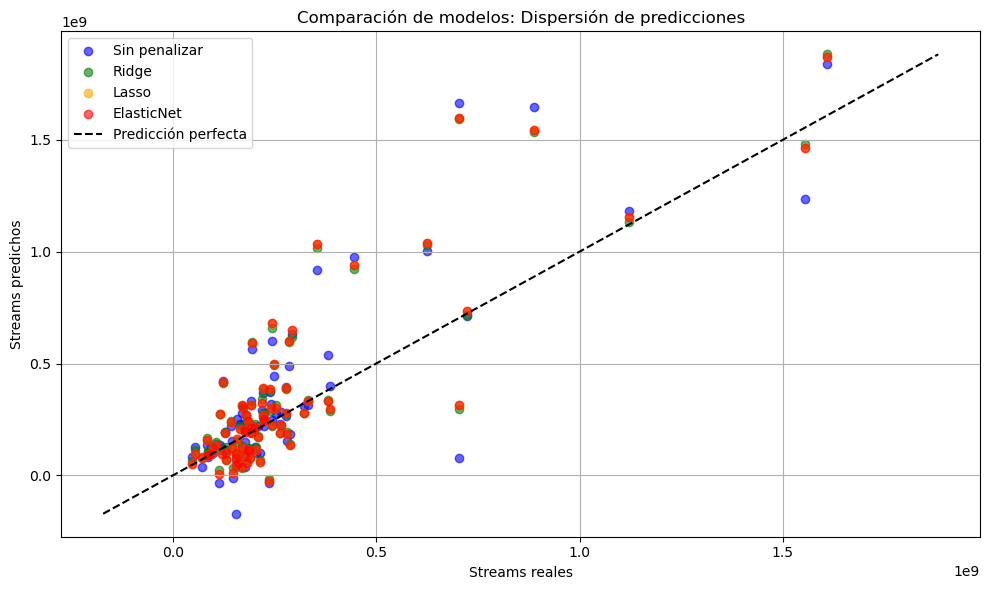

In [920]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Modelo Polinómico
plt.scatter(y_test, y_pred_test, alpha=0.6, label='Sin penalizar', color='blue')

# Ridge
plt.scatter(y_test, y_pred_testr, alpha=0.6, label='Ridge', color='green')

# Lasso
plt.scatter(y_test, y_pred_testl, alpha=0.6, label='Lasso', color='orange')

# ElasticNet
plt.scatter(y_test, y_pred_test_elastic, alpha=0.6, label='ElasticNet', color='red')

# Línea de referencia (predicción perfecta)
min_val = min(y_test.min(), y_pred_test.min(), y_pred_testr.min(), y_pred_testl.min(), y_pred_test_elastic.min())
max_val = max(y_test.max(), y_pred_test.max(), y_pred_testr.max(), y_pred_testl.max(), y_pred_test_elastic.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Predicción perfecta')

# Etiquetas y formato
plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Comparación de modelos: Dispersión de predicciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Aca podemos ver que el mejor modelo de los entrenados es el que no esta penalizado pero al ver su R^2 del test nos damos cuenta del overfit enorme, en los otros modelos que hay penalizacion esto mejora mucho pero no lo suficiente para afirmar que es un buen modelo ya que queda mucha varianza que no podemos explicar en ambos modelos (alrdedor del 30% no podemos explicar), además, de que las R^2 de test, nos dan valores comprobamos que sí hubo overfit.

Todas las variables son distintas de 0 a partir de la variable 22, ahí la probabilidad aumenta nuestro alpha que es del 5% multiples veces por lo que hacer la x^4 puede que no cambie o hasta dañe mas nuestro análisis, puede que una expresión logaritmica exprese mejor estos valores

### Conclusiones

Una vez observados los distintos modelos que tenemos, podemos concluir que para este dataset no es necesario llegar a modelos tan grandes como lo fue el de orden 4, que nos dio un gran sobreajuste, puesto que desde el primer modelo podemos observar que la mayoría de las variables que describen una canción no son tan significativas en la relación con su popularidad o streamer. Además, en los dos primeros modelo podemos ver que las excepciones a los p-values altos son las variables de x2 y x3, en ambos modelos, de igual forma que en el modelo se presentan también x1, x12 y x13, dandonos a entender que las características que si tienen significancia para la popularidad son 'in_spotify_playlists', cuando esta se eleva al cuadrado,'in_spotify_charts'y 'bpm', estas dos últimas al elevarse al cuadrado siguen siendo significativas, por lo que, suponemos que son las variables que tienen más relación con los streams. Con esto podemos decir que el hecho de que una canción sea la más popular no depende de una característica o fórmula universal, sino de una combinación de estas que logran atraer al público.

### Bibliografía

Statistics Easily. (s.f.). ¿Qué es la regresión polinómica?. Statistics Easily. https://es.statisticseasily.com/glosario/%C2%BFQu%C3%A9-es-la-regresi%C3%B3n-polin%C3%B3mica%3F/

Statistics Easily. (s.f.). ¿Qué es la regularización?. Statistics Easily. https://es.statisticseasily.com/glosario/que-es-la-regularizaci%C3%B3n/

García, M., & García, J. (2017). Regresión polinómica: una alternativa para el análisis de datos longitudinales. Revista Española de Salud Pública, 91, e1–e10. https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S1139-76322017000500014

Probabilidad y Estadística. (s.f.). Regresión polinomial. ProbabilidadyEstadistica.net.. https://www.probabilidadyestadistica.net/regresion-polinomial/

López, C. (s.f.). Capítulo 5: Regresión polinomial. Universidad Nacional Agraria La Molina. http://tarwi.lamolina.edu.pe/~clopez/Regresion/Capitulo_5.pdf

Definicion.de.. (s.f.). Regresión lineal. Definicion.de.. https://definicion.de/regresion-lineal/